## Exercise in Photogrammetry I
## **Ex.4 : Binary Images**
### Hand out: xx.xx.xxxx 
### Submission: xx.xx.xxxx 
### Points: 30

## A. Binary Images and Connected Components *(18 points)*

In this task you will learn how to **convert grayscale** images to **binary** images by applying a certain **thresold**. Finally, based on the binary image we can **identify** which **components** are connected to compute the **number of objects** in the image.

**Tasks:**
1. Load the grayscale image ```shapes.png``` from disk and print its minimum and maximum value. Finally, visualize the grayscale image. *(0.5 points)*
2. Convert the grayscale image to a binary image by applying a threshold of $T=100$. Make sure that all pixels > T have an intensity value of 1 (foreground) and all other pixels have an intensity value of 0 (background). Print the minimum and maximum value of your converted image. Finally, visualize the binary image. *(1.5 points)*
3. In the lecture you discussed two algorithms to identify connected components in a binary image. Implement the *Connected Components for Grids* algorithm and apply it to the previous defined binary image by following each step outlined below:
    - Write a function called ```connected_components(binary_img, neighborhood)``` which computes the *components image* for either *N4 neighborhood* or *N8 neighborhood* **but** does not apply the *equivalence graph* (see *Algorithm 1 in lecture*). Do not use any external python functions which compute the *components image* for you.  *(8 points)*
      <br> **Hint:** Write functions to get the *N4* and *N8 neighborhood* since this operation will be used in other tasks as well
      
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    - Apply the *equivalence graph* to the *components image* and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(4 points)*
    - Finally, print the number of components in the binary image for *N4 neighborhood* and *N8 neighborhood*. If there is any difference explain why this is the case. *(2 points)*
    

In [1]:
# ### if running from google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


### A1

In [3]:
# Load the grayscale image
filename='images/shapes.png'
image=skimage.io.imread(filename,as_gray=True)

In [4]:
# Print the minimum and maximum value of the grayscale image
print('Maximum value of displayed image:',image.max())
print('Minimum value of displayed image:',image.min())

Maximum value of displayed image: 180
Minimum value of displayed image: 0


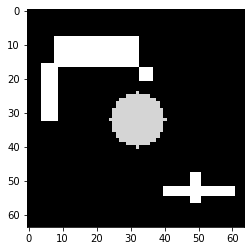

In [5]:
# Visualize the grayscale image
plt.imshow(image,cmap='gray')

### A2

In [6]:
# Convert the grayscale image to a binary image {0,1}

###Instructions
###Convert the grayscale image to a binary image by applying a threshold of  𝑇=100 . 
###Make sure that all pixels > T have an intensity value of 1 (foreground) 
###and all other pixels have an intensity value of 0 (background)

binary_image=np.where(image>100,1,0)

In [7]:
# Print the minimum and maximum value of the binary image
print('Maximum value of displayed image:',binary_image.max())
print('Minimum value of displayed image:',binary_image.min())

Maximum value of displayed image: 1
Minimum value of displayed image: 0


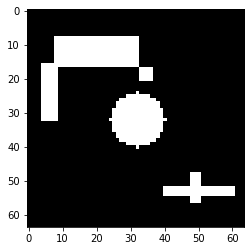

In [8]:
# Visualize the binary image
plt.imshow(binary_image,cmap='gray')

### A3

In [9]:

def N4(img,component_img,position):
    '''Return list of tuples indicating valid N4 neighbours of position in img where pixel is 1 and the component_img is 0
    Inputs
    img: ndarray
     n-dimensional array
    component_img: ndarray
     n-dimensional array of the output component_img (for the computation of connected components)
    position: tuple
     position in the img
       
    '''
    i,j=position
    neighbors={(i,j-1),(i-1,j),(i,j+1),(i+1,j)}
    valid_neighbors=set()
    for neighbor in neighbors:
        if img[neighbor]==1 and component_img[neighbor]==0:
            
            valid_neighbors.update([neighbor])
    return valid_neighbors

def N8(img,component_img,position):
    i,j=position
    neighbors={(i,j-1),(i-1,j),(i,j+1),(i+1,j),(i-1,j-1),(i-1,j+1),(i+1,j+1),(i+1,j-1)}
    valid_neighbors=set()
    for neighbor in neighbors:
        if img[neighbor]==1 and component_img[neighbor]==0:
            
            valid_neighbors.update([neighbor])
    return valid_neighbors

def connected_components(img, neighborhood):
    ''' Return number of components K, and the component_img as a ndarray
    Inputs:
    img: ndarray
      n-dimensional array
    neighborhood: int
      Either N4 (4) or N8 Neighborhood (8)
    Returns:
    K: int 
     Number of components in the input img
    component_img: ndarray
     n-dimensional array indicating where each pixel value will be its component number. Pixel in the background will have pixel value 0. Pixel in component 1 will have pixel value 1   
    '''
    # initializing component number K to 0, component_img to 0
    K=0
    component_img=np.zeros(img.shape)
    I=img.shape[0]
    J=img.shape[1]
    
    # all rows
    for i in range(I):
      # all columns
      for j in range(J):
        # if pixel of input image is 1 and have not assigned component no to that pixel
        if img[i,j]==1 and component_img[i,j]==0:
          K+=1
          component_img[i,j]=K
          #setting up queue system and visited system (BFS-like)
          queue=[(i,j)]
          visited=set([(i,j)])
          while queue:
            position=queue.pop(0)

            if neighborhood==4:
              valid_neighbors=N4(img,component_img,position)
            elif neighborhood==8:
              valid_neighbors=N8(img,component_img,position)
            else:
              raise ValueError('Please enter 4 or 8 in the neighborhood')
            for neighbor in valid_neighbors:
              if neighbor not in visited:
                  component_img[neighbor]=K
                  visited.add(neighbor)
                  queue.append(neighbor)

    component_img=component_img.astype(np.uint8)         
    return K,component_img

<AxesSubplot:>

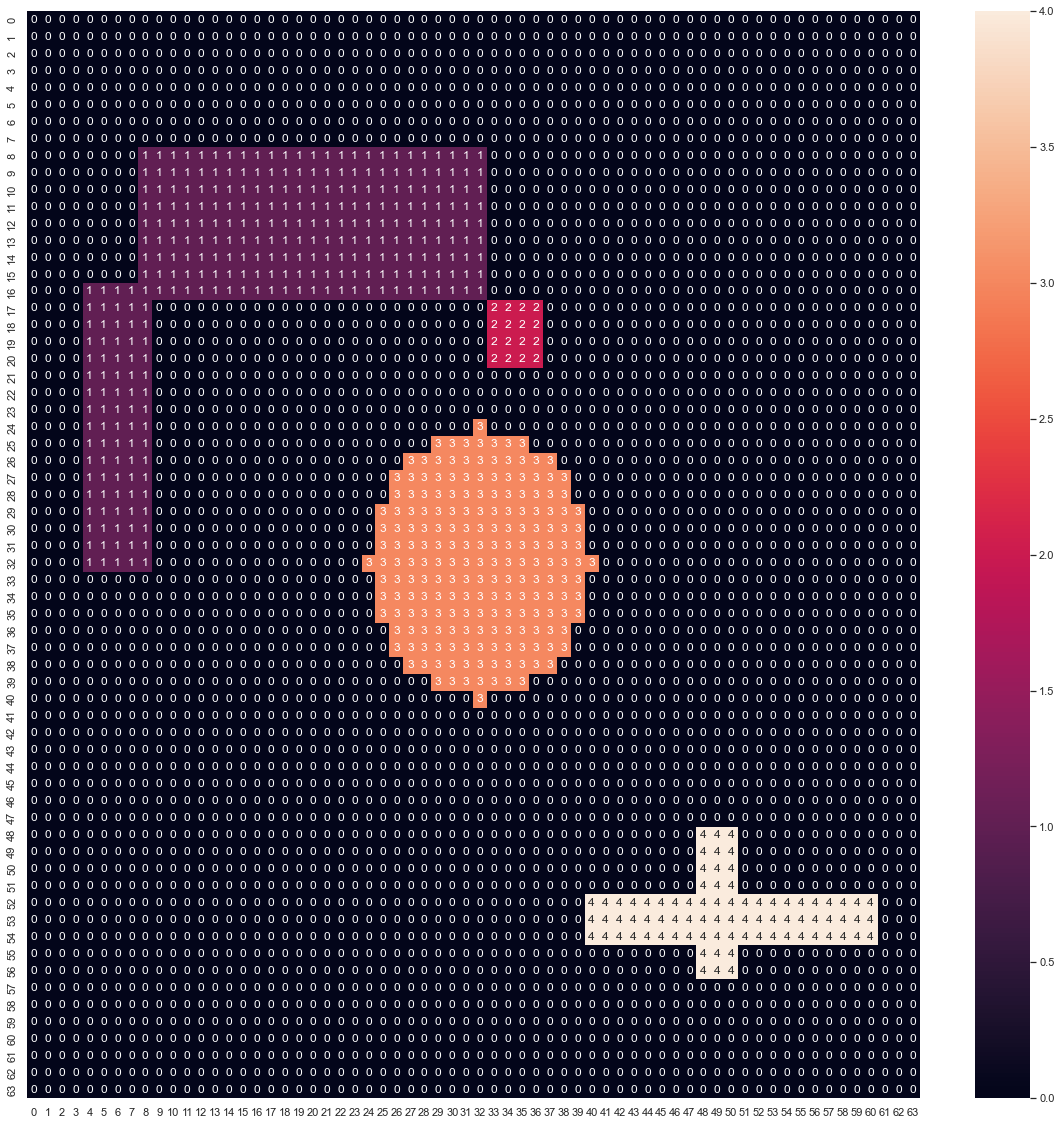

In [10]:
# Compute the components image with N4 Neighborhood and visualize your result
import seaborn as sns
K,component_img_N4=connected_components(binary_image,4)

sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(component_img_N4, annot=True)

<AxesSubplot:>

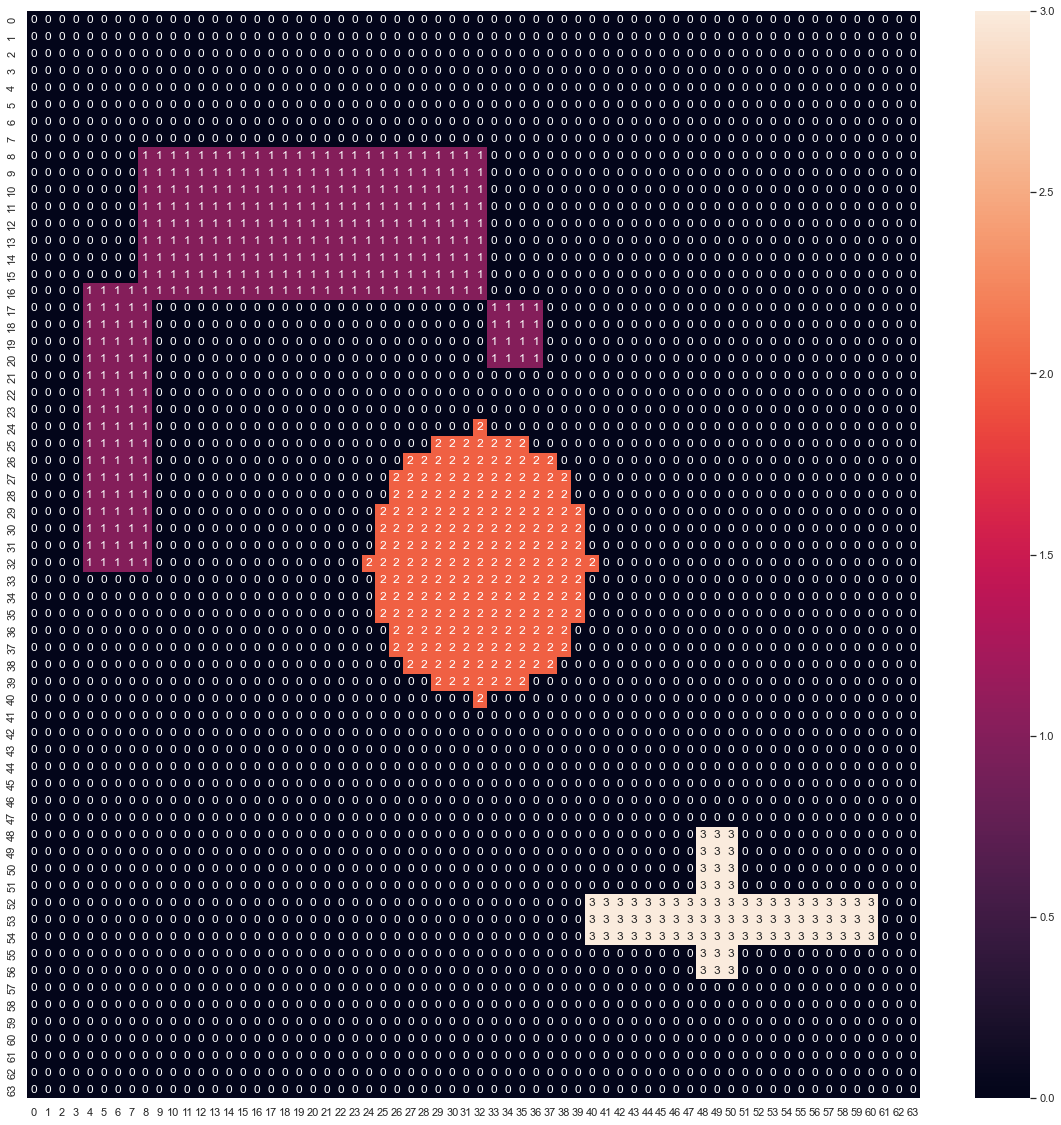

In [11]:
# Compute the components image with N8 Neighborhood and visualize your result

K,component_img_N8=connected_components(binary_image,8)

sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(component_img_N8, annot=True)

<AxesSubplot:>

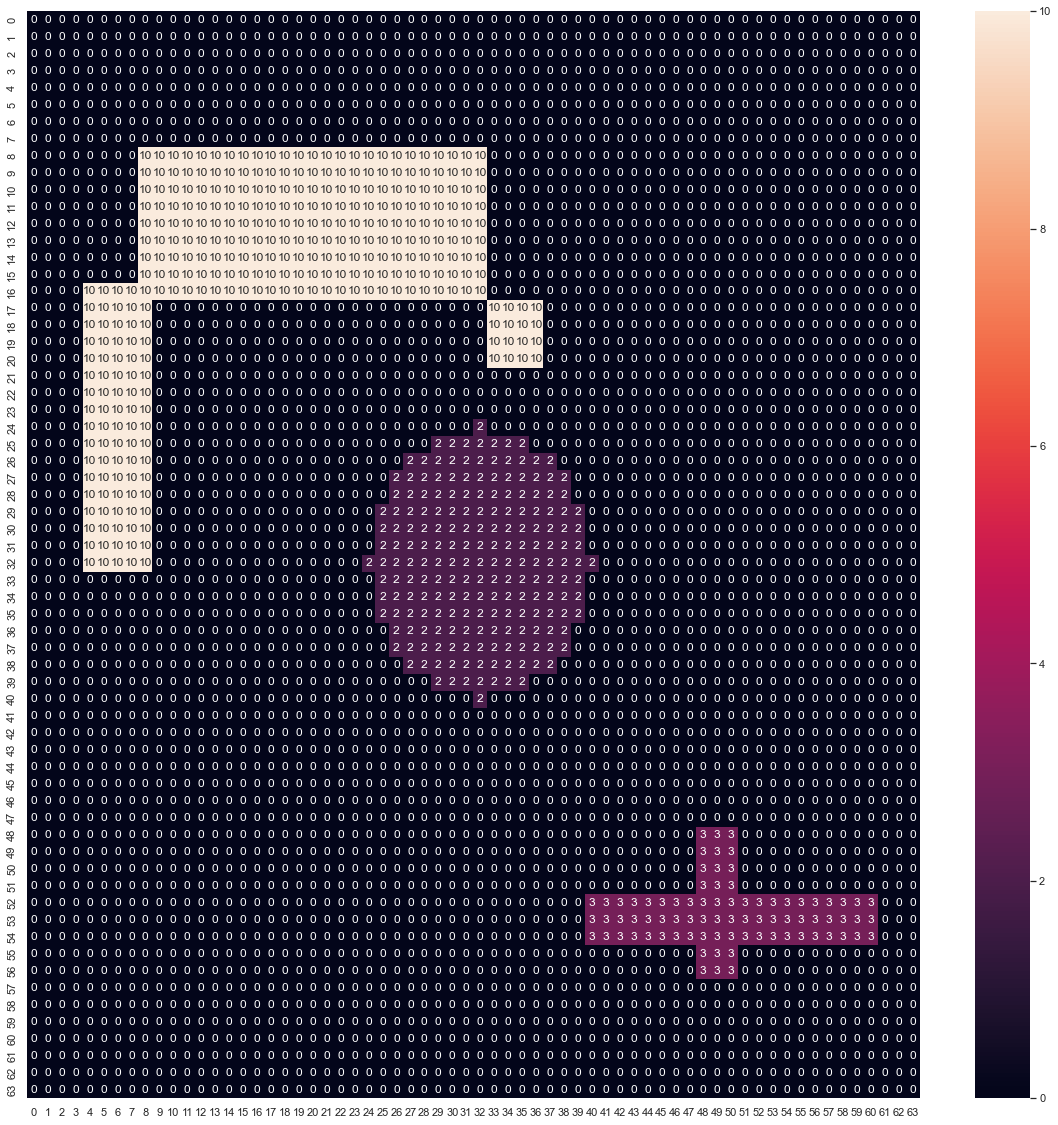

In [12]:
### replacing np.array intensity value of 1 to 10
sns.heatmap(np.where(component_img_N8==1,10,component_img_N8), annot=True)

In [13]:
component_img=np.zeros(binary_image.shape,dtype=np.uint8)
N4(binary_image,component_img,(16,8))

{(15, 8), (16, 7), (16, 9), (17, 8)}

In [14]:
### Connected components for Grids/Binary Images
def N(r,c,binary_image,component_image):
    labelled_neighbors=set()
    top=r-1,c
    left=r,c-1
    for i in [top,left]:
        if binary_image[i]==1 and component_image[i]>=1:
            labelled_neighbors.add(component_image[i])
    return labelled_neighbors


def connected_components_binary_image_v2(binary_image,neighborhood):
    R,C=binary_image.shape
    K=0
    component_image=np.zeros(binary_image.shape,dtype=np.uint8)
    # Initialise equivalence table as a table and later as a table of sets
    equiv_table=[]
    # first pass:labelling components temporarily
    for r in range(R):
        for c in range(C):
            if binary_image[r,c]==1:
                A=N(r,c,binary_image,component_image)

                # any labelled neighbors
                if list(A):
                    lowest=min(A)
                    component_image[r,c]=lowest
                    not_in_table=True

                    ##checking this set (A) intersect with any sets in the equivalence table, if yes, union the table
                    for idx,equiv_set in enumerate(equiv_table):
                        if A.intersection(equiv_set):
                            not_in_table=False
                            equiv_table[idx]=A.union(equiv_set)
                            break
                        
                    # the set (A) does not interset with any sets in the equivalence table, so add this set to the equivalence table
                    if not_in_table and A not in equiv_table:

                        equiv_table.append(A)
                
                # no labelled neighbors
                else:
                    K+=1
                    component_image[r,c]=K
    
    ### removing items in table where the set is only 1 item
    for item in equiv_table:
        if len(item)==1:
            equiv_table.remove(item)
    ## Second pass: eliminate duplicate labels in equiv_table
    for idx,equiv_set in enumerate(equiv_table):
        
        replace_list=list(equiv_set)
        # to_replace with the index of the list, 1st set idx 1, 2nd set idx 2
        to_replace=idx+1
        for item in replace_list:
            component_image=np.where(component_image==item,to_replace,component_image)
    return K,component_image,equiv_table       

In [15]:
a=[1,2,3]
a.remove(2)
print(a)

[1, 3]


11 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [{1, 2}, {3}, {4, 5, 6, 7, 8, 9}, {10, 11}]


<AxesSubplot:>

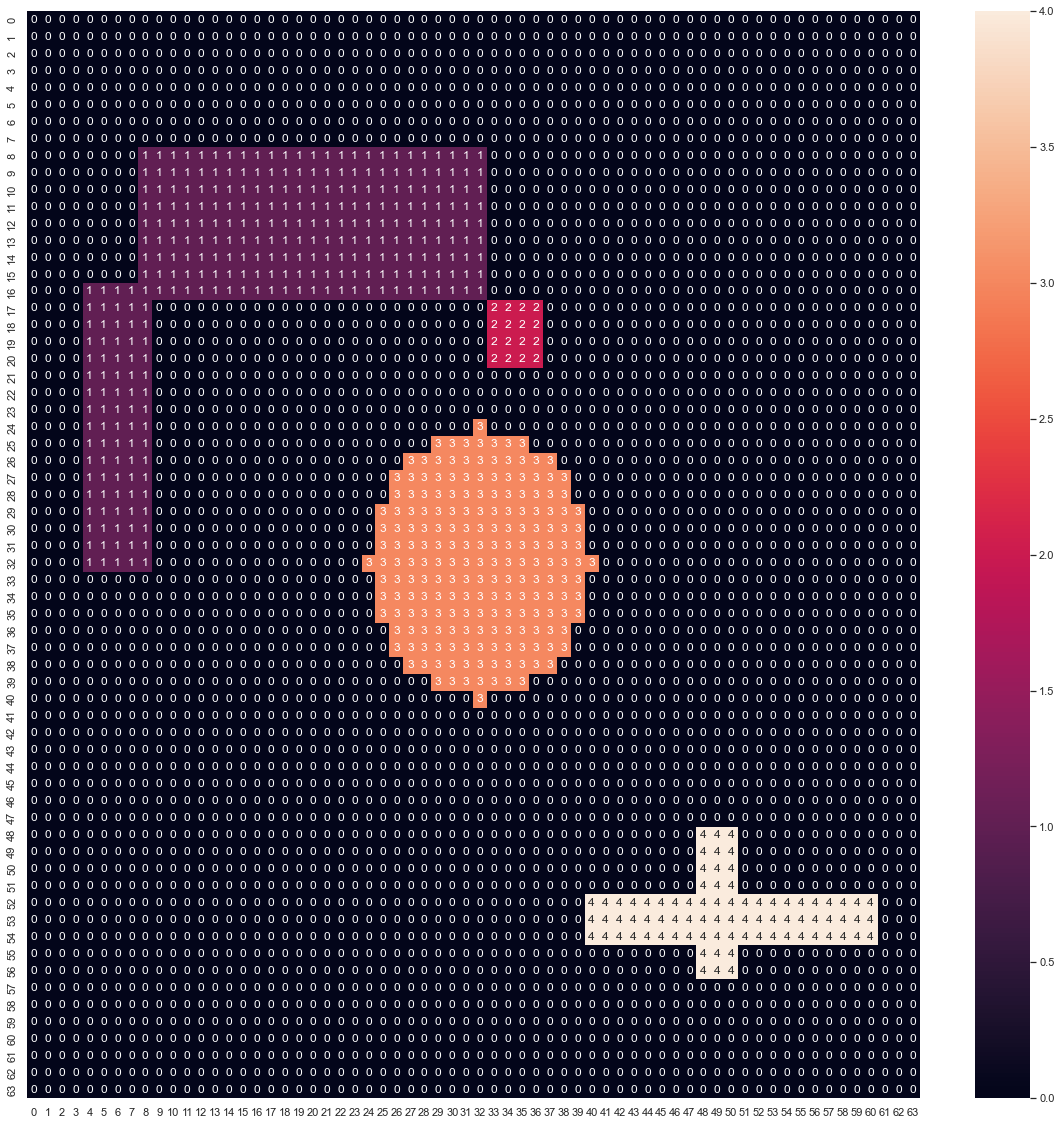

In [16]:
import seaborn as sns
K,component_image,equiv_table=connected_components_binary_image_v2(binary_image, 4)

print(K,component_image,equiv_table)
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(component_image, annot=True)

In [17]:
table=[{1},{2},{3}]
for idx,item in enumerate(table):
    if {1,2}.intersection(item):

        table[idx]=item.union({1,2})
table

[{1, 2}, {1, 2}, {3}]

If there is any difference in the number of components explains why this is the case:<br>
*Your answer*

## B. Morphological Operations and Distance Transformation *(12 points)*

In the lecture your discussed *Morphological Operators* to expand and shrink the foreground of binary images as well as the *Distance Transformation* to compute the distance from any pixel to the border of the components.

**Tasks:**
1. Implement the *Distance Transformation* algorithm and apply it to the previous defined binary image (*A2*) by following each step outlined below:
    - Write a function called ```distance_transformation(binary_img, neighborhood)``` which computes the *distance image* for either *N4 neighborhood* or *N8 neighborhood*. Do not use any external python functions which compute the *distance image* for you. *(5 points)*
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    
2. Apply a *Dilation* to the binary image by using the the ```skimage.morphology``` module ([link](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation))
    - Follow the steps provided by the [example](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation) to dilate the binary image *(2 points)*
    - Visualize your results and describe your observations *(1 point)*
    
3. Finally, apply the *Distance Transformation* with N4 neighborhood to the dilated binary image and visualize your result. *(2 points)*

### B1

In [18]:
# Write a function called distance_transformation(binary_img, neighborhood) to compute the distance matrix
#### Lousy implementation
def distance_transformation(binary_img, neighborhood):
    
    k=np.where(binary_image==1,0,binary_image.shape[0])
    R=binary_img.shape[0]
    C=binary_img.shape[1]

  #1st pass
    for r in range(R):
        for c in range(C):
            if neighborhood==4:
                if r==0 and c==0:
                    pass
                elif r==0:
                    k[r,c]=min(k[r,c],k[r,c-1])
                elif c==0:
                    k[r,c]=min(k[r,c],k[r-1,c])
                else:
                    k[r,c]=min(k[r,c],k[r,c-1]+1,k[r-1,c]+1)
            elif neighborhood==8:
                if r==0 and c==0:
                    pass
                elif r==0:
                    k[r,c]=min(k[r,c],k[r,c-1])
                elif c==0:
                    k[r,c]=min(k[r,c],k[r-1,c])
                elif c==C-1:
                    k[r,c]=min(k[r,c],k[r,c-1]+1,k[r-1,c]+1,k[r-1,c-1]+1)
                
                else:
                    k[r,c]=min(k[r,c],k[r,c-1]+1,k[r-1,c]+1,k[r-1,c-1]+1,k[r-1,c+1]+1)

    #2nd pass
    
    for r in reversed(range(R)):
        for c in reversed(range(C)):
            if neighborhood==4:
                if r==R-1 and c==C-1:
                    pass
                elif r==R-1:
                    k[r,c]=min(k[r,c],k[r,c+1]+1)
                elif c==C-1:
                    k[r,c]=min(k[r,c],k[r+1,c]+1)
                else:
                    k[r,c]=min(k[r,c],k[r,c+1]+1,k[r+1,c]+1)
            
            elif neighborhood==8:
                if r==R-1 and c==C-1:
                    pass
                elif r==R-1:
                    k[r,c]=min(k[r,c],k[r,c+1]+1)
                elif c==C-1:
                    k[r,c]=min(k[r,c],k[r+1,c]+1)
#                 elif r==0:
#                     k[r,c]=min(k[r,c],k[r,c+1]+1,k[r+1,c]+1,k[r+1,c+1]+1)
                else:
                    k[r,c]=min(k[r,c],k[r,c+1]+1,k[r+1,c]+1,k[r+1,c+1]+1,k[r+1,c-1]+1)
    return k

In [19]:
## new implementation with padding
# Write a function called distance_transformation(binary_img, neighborhood) to compute the distance matrix
import cv2 as cv

def padding(image):
    return cv.copyMakeBorder(image,1,1,1,1,cv.BORDER_CONSTANT,value=0)
def remove_padding(image):
    return image[1:-1,1:-1]

def distance_transformation_v2(binary_img, neighborhood):
    R,C=binary_img.shape
    #padding so that easier to deal with corner cases
    padded_img=padding(binary_img)
    k=np.where(padded_img==1,0,R)
    
    if neighborhood==4:
        for r in range(R+1):
            for c in range(C+1):
                k[r,c]=min(k[r,c],k[r,c-1]+1,k[r-1,c]+1)
        for r in reversed(range(R+1)):
            for c in reversed(range(C+1)):
                k[r,c]=min(k[r,c],k[r,c+1]+1,k[r+1,c]+1)

        
    elif neighborhood==8:
        for r in range(R+1):
            for c in range(C+1):
                k[r,c]=min(k[r,c],k[r,c-1]+1,k[r-1,c]+1,k[r-1,c-1]+1,k[r-1,c+1]+1)
        for r in reversed(range(R+1)):
            for c in reversed(range(C+1)):
                k[r,c]=min(k[r,c],k[r,c+1]+1,k[r+1,c]+1,k[r+1,c+1]+1,k[r+1,c-1]+1)

    distance_matrix=remove_padding(k)    
    return distance_matrix

<AxesSubplot:>

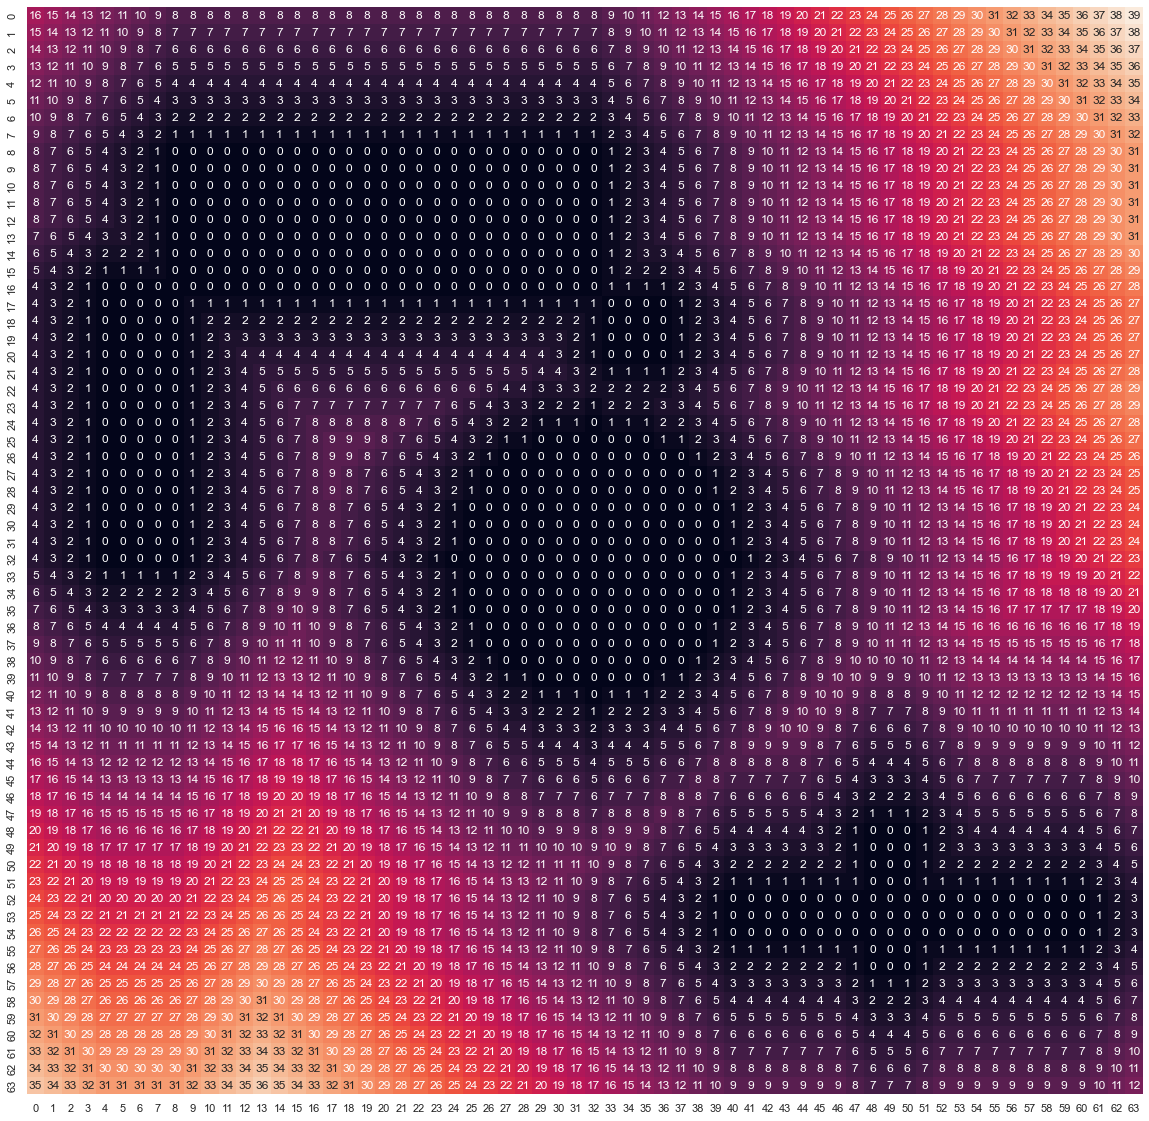

In [20]:
## Visualised Distance transformation matrix for N4 Neighborhood
matrix_new_n4=distance_transformation_v2(binary_image, 4)
sns.heatmap(matrix_new_n4, annot=True,cbar=False)


<AxesSubplot:>

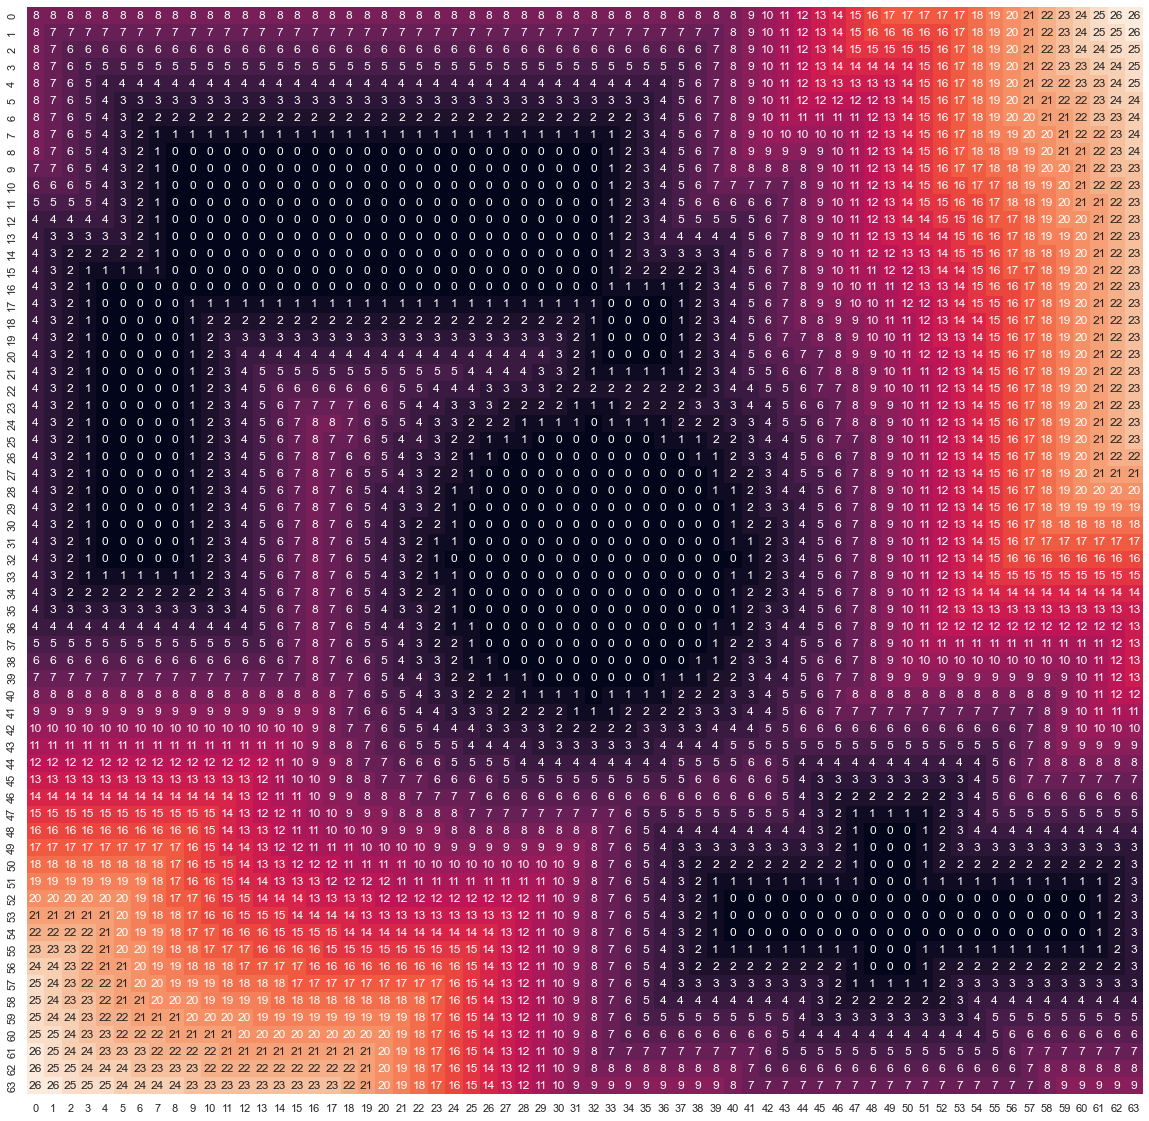

In [21]:
## Visualised Distance transformation matrix for N8 Neighborhood
matrix_new_n8=distance_transformation_v2(binary_image, 8)
sns.heatmap(matrix_new_n8, annot=True,cbar=False)

### B2

In [24]:
# Apply a Dilation to the binary image
from skimage.morphology import square,dilation
dilated=dilation(binary_image,square(3))

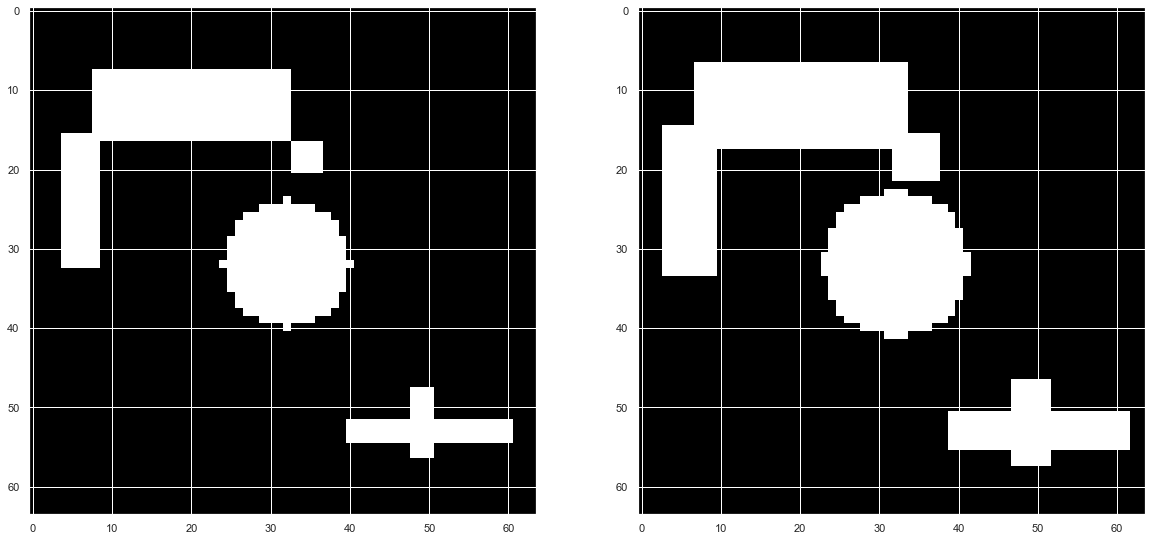

In [25]:
# Visualize the dilated binary image
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(binary_image,cmap='gray')
ax2.imshow(dilated,cmap='gray')

**Explain your observations here**
> White pixels are dilated

### B3